<h1>SVD Demo: Using SVD for image compression</h1>
Maria Fritzela

Import needed libraries

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.datasets import load_sample_images
print("Imports finished")

Imports finished


<h2>1. Open and preprocess image</h2>

Open the sample image from `sklearn.datasets`

In [ ]:
dataset = load_sample_images()
img_data = dataset.images[0]
img_data

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

The image is already in RGB format and uint8 so it can be easilty converted into an image object

In [ ]:
x = Image.fromarray(img_data)

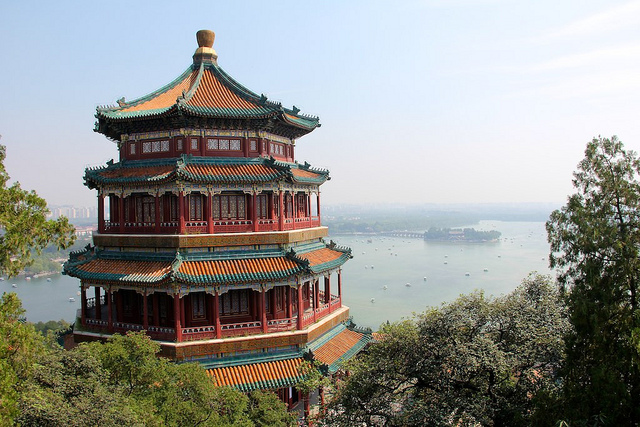

In [ ]:
# display image
x

An image is stored as a matrix. An image in RGB color model stores an image in three matrices one each for Red, Green, and Blue color.<br>
The image is converted to Grayscale mode, to be stored as a 2-dimentional matrix

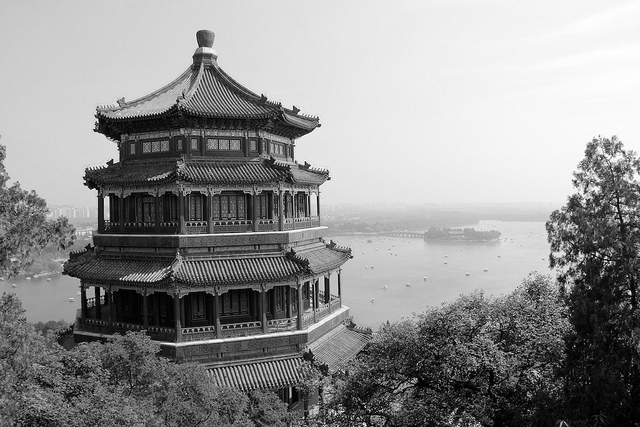

In [ ]:
# convert image to Grayscale
x = x.convert("L")
x

Showing the image as an array:

In [ ]:
np.asarray(x,dtype=np.uint8)

array([[196, 196, 196, ..., 251, 251, 251],
       [194, 195, 195, ..., 252, 252, 252],
       [196, 196, 196, ..., 253, 253, 253],
       ...,
       [ 74, 133, 109, ...,  40,  11,   9],
       [107, 115, 105, ...,  10,  12,  20],
       [ 99,  89,  95, ...,  46,  17,  19]], dtype=uint8)

In [ ]:
x.size

(640, 427)

Original file size: `640 x 427 = 273,280` values



<h2>2. Decompose the image using SVD</h2>

In [ ]:
# compute SVD
u, s, vh = np.linalg.svd(x, full_matrices=True)

In [ ]:
# check shapes
u.shape, s.shape, vh.shape

((427, 427), (427,), (640, 640))

<h2> 3. Reconstruct the image using the k singular values</h3>

Note that `s` is returned as a 1-dimentional array.<br> 
To compute the dot product and reconstruct the original image, it is necessary to create a matrix with the same dimensions of the image (212 x 225) with the values of `s` on the main diagonal




In [ ]:
sig = np.zeros((x.size[0], x.size[1]))
sig[:s.shape[0], :s.shape[0]] = np.diag(s)
sig

array([[83308.12318662,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 15365.43937568,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,  9869.3509309 , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [ ]:
# Reconstruction of the matrix using the first 50 singular values
x_approx = u[:, :50] @ sig[:50, :50] @ vh[:50, :]

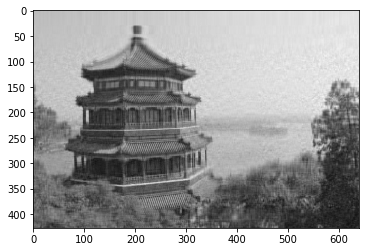

In [ ]:
# plot
plt.imshow(x_approx, cmap='gray')

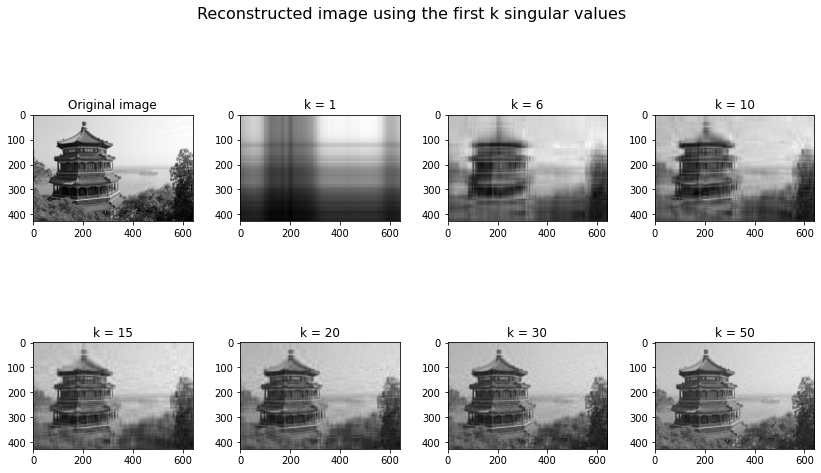

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k singular values", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(x, cmap='gray')
axes[0, 0].set_title("Original image")

k_list = [1, 6, 10, 15, 20, 30, 50]
for k, i in zip(k_list, range(1,8)):
    # Reconstruction of the matrix using the first k singular values
    x_approx = u[:, :k] @ sig[:k, :k] @ vh[:k, :]

    axes[i // 4, i % 4].imshow(x_approx, cmap='gray')
    axes[i // 4, i % 4].set_title("k = {}".format(k))

plt.show()

To be able to reconstruct the image using the first k singular values, the first k σi, ui, and vi are used.<br> 

Thus, using SVD the image can be compressed a lot in size while still retaining the important information.